In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<Container object of 7 artists>

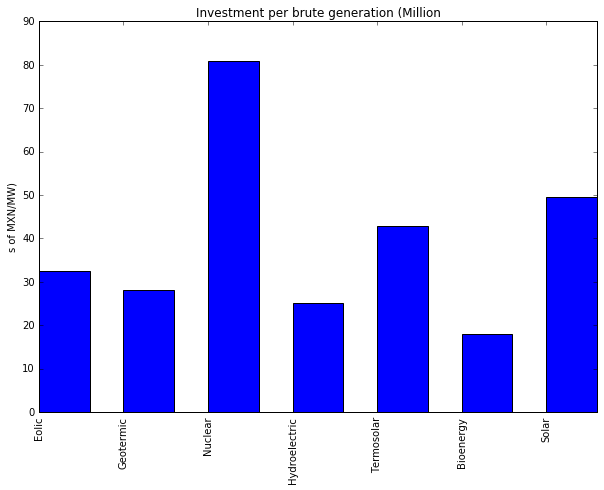

In [2]:
df= pd.read_csv("tables/FutureInvestmentProjects.csv",index_col=range(2),header=0)
tec=list(set(df.xs([2016]).index.tolist()))
dfi=pd.DataFrame(index=tec,columns=['Investment per brute generation (Millions of MXN/MW)'])
e='Investment per brute generation (Millions of MXN/MW)'
for t in tec:
    invt=[]
    gent=[]
    for a in range(2016,2031):
        try: invt.append(sum(df.xs([a,t])['Investment (MXN* 10^6)'].tolist()))
        except KeyError: invt.append(0)
        try: gent.append(sum(df.xs([a,t])['Brute capacity (MW)']))
        except KeyError: gent.append(0)
    dfi.set_value(t,e, sum(invt)/sum(gent))
plt.figure(1,figsize=(10,7),dpi = 200)
plt.xticks(range(len(tec)), dfi.index.tolist(), rotation='vertical')
plt.ylabel(e[40:])
plt.title(e[:40])
plt.bar(range(len(tec)),dfi[e].tolist(),.60,color='b') 

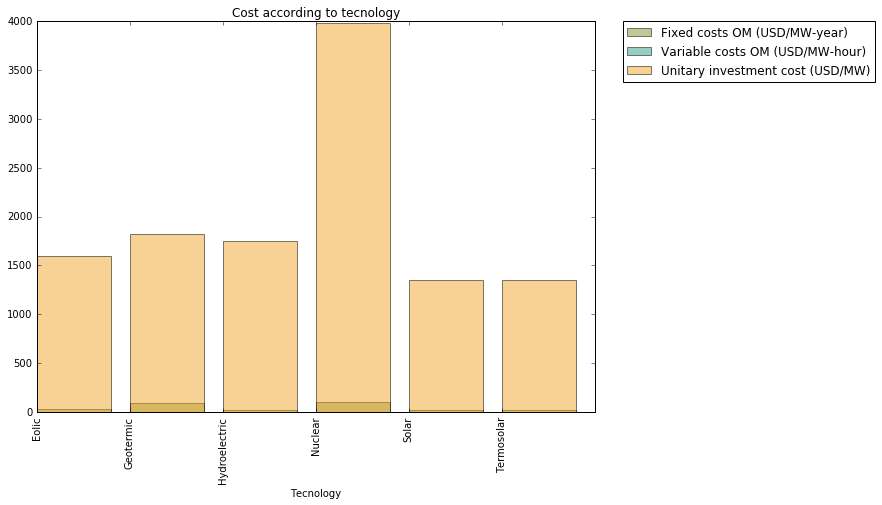

In [4]:
cos_tec=pd.read_csv('tables/CostPerTec.csv',header=0,index_col=0)
cos=cos_tec.columns.tolist()
plt.figure(2,figsize=(10,7),dpi = 200)
for i in cos:
    plt.bar(range(6),cos_tec.loc[:,i],alpha=.5,color=np.random.rand(3),label=i)
plt.title('Cost according to tecnology')
plt.xticks(range(7),cos_tec.index.tolist(),rotation='vertical')
plt.xlabel('Tecnology')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

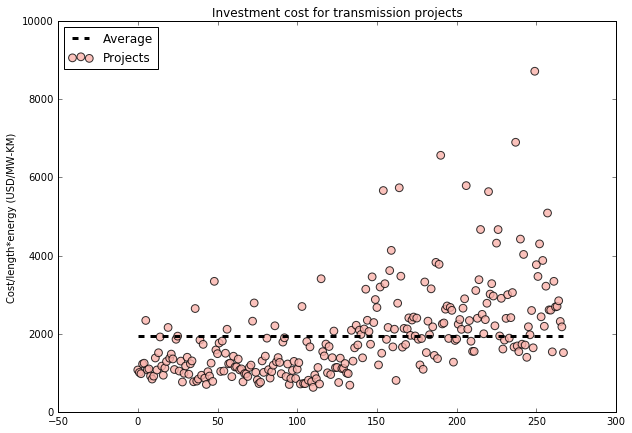

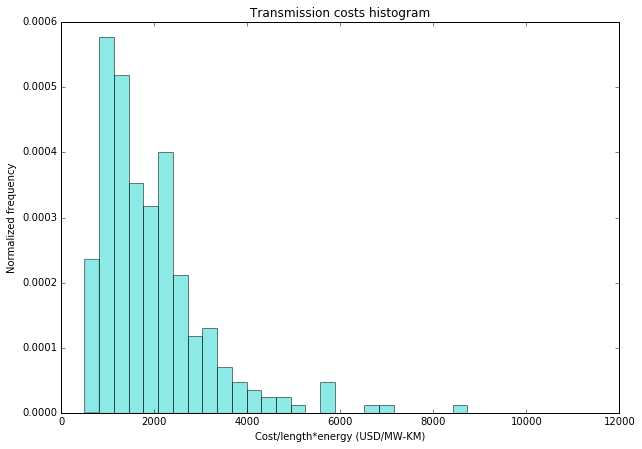

In [6]:
dft=pd.read_csv('tables/TransmissionProjectsCost.csv',header=0)
plt.figure(1,figsize=(10,7),dpi = 200)
plt.scatter(dft.index.tolist(),dft['Cost (USD/MW-KM)'].tolist(),s=60,alpha=.8,c=[np.random.rand(3)]*len(dft.index.tolist()),label='Projects')
plt.ylabel('Cost/length*energy (USD/MW-KM)')
plt.title('Investment cost for transmission projects')
plt.plot([0,267],[dft['Cost (USD/MW-KM)'].mean()]*2,'--',linewidth=3,c='k',label='Average')
plt.legend(loc=2)
plt.show()
plt.figure(2,figsize=(10,7),dpi = 200)
plt.hist(dft['Cost (USD/MW-KM)'].tolist(),bins=30,range=(500,10000),color='#1BD5CC',alpha=.5,normed=True)
plt.title('Transmission costs histogram')
plt.xlabel('Cost/length*energy (USD/MW-KM)')
plt.ylabel('Normalized frequency')
plt.show()


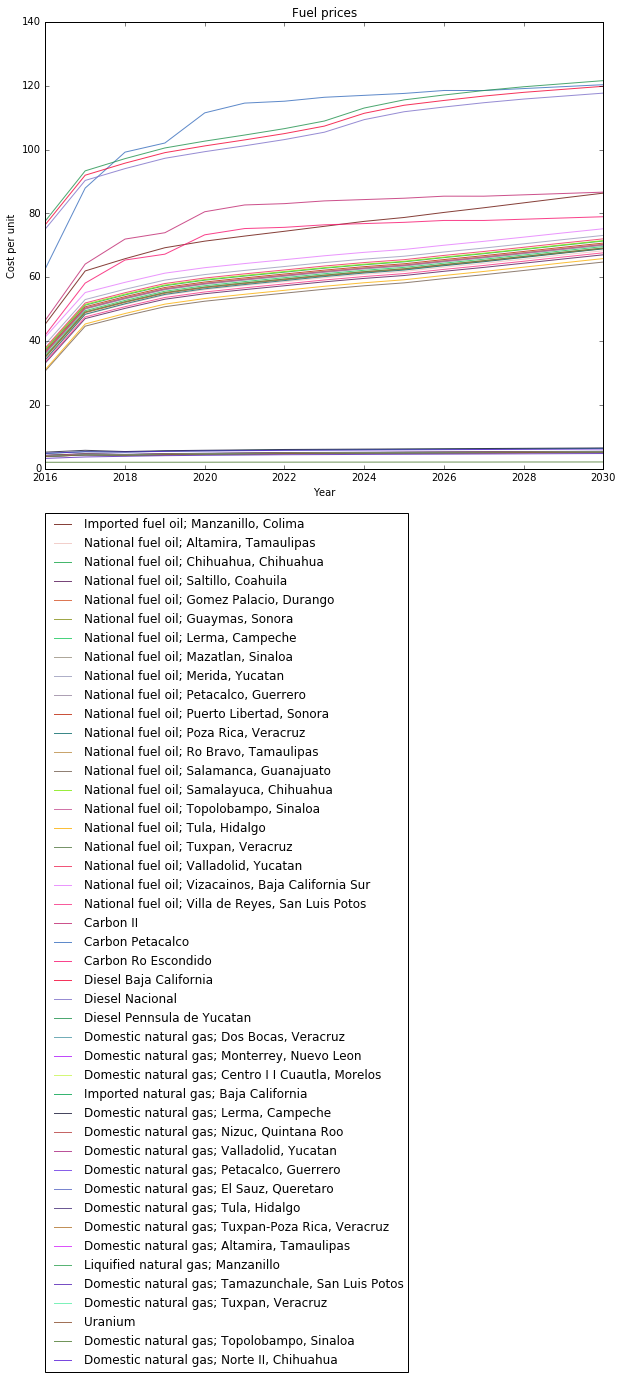

In [3]:
fuel=pd.read_csv('tables/fuels.csv',header=0)

col=[]
for i in range (45):
    col.append(fuel['Name2'].xs(i))
fuel = fuel.loc[:,['Year','Cost']]
for i in range(0,len(col)-1):
    fuel['Columna{0}'.format(i+2)]=pd.Series(fuel.iloc[(i+1)*15:(i+2)*15,1].tolist())
fuel=fuel.iloc[0:15,:]
fuel=fuel.set_index('Year')
fuel.columns=col
plt.figure(1,figsize=(10,8),dpi=200)
for i in col:
    plt.plot(fuel[i],c=np.random.rand(3),alpha=.8,label=i)
plt.title('Fuel prices')
plt.xlabel('Year')
plt.ylabel("Cost per unit")
plt.legend(bbox_to_anchor=(0,-.1), loc=2, borderaxespad=0.)
plt.show()
fuel.to_csv("tables/FuelsOrganized.csv")
    


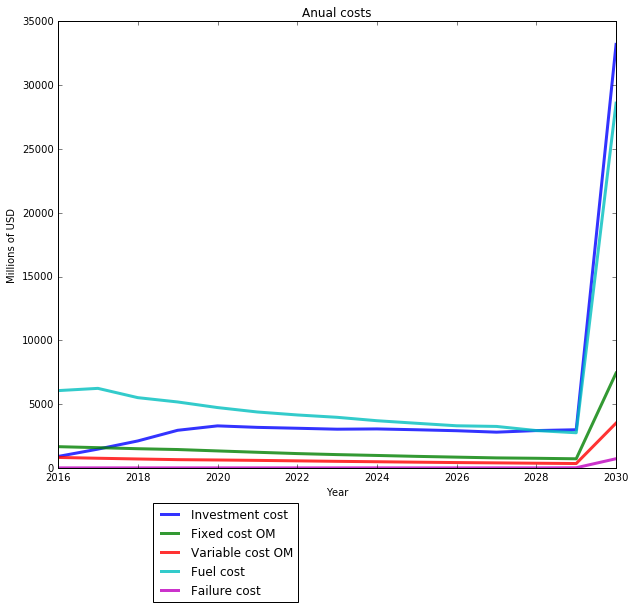

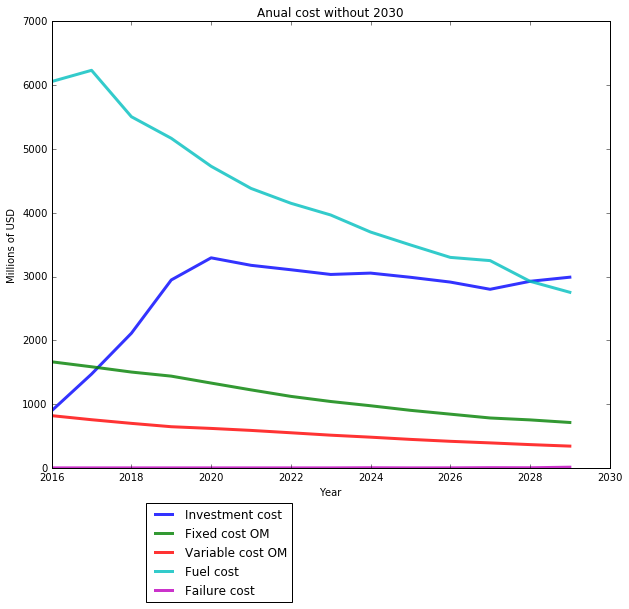

In [14]:
cost_sen=pd.read_csv('tables/SenCost.csv',header=0,index_col=0)
cost_sen=cost_sen.iloc[0:15,0:5]
plt.figure(1,figsize=(10,8),dpi=200)

for i in range(5):
    plt.plot(cost_sen.iloc[:,i],linewidth=3,alpha=.8)
plt.title('Anual costs')
plt.xlabel('Year')
plt.ylabel('Millions of USD')
plt.legend(bbox_to_anchor=(0.30,-.30), loc=8, borderaxespad=0.0)
plt.show()
cost_sen=cost_sen.iloc[0:14,0:5]
plt.figure(2,figsize=(10,8),dpi=200)
for i in range(5):
    plt.plot(cost_sen.iloc[:,i],linewidth=3,alpha=.8)
plt.title('Anual cost without 2030')
plt.xlabel('Year')
plt.ylabel('Millions of USD')
plt.legend(bbox_to_anchor=(0.30,-.30), loc=8, borderaxespad=0.0)
plt.show()


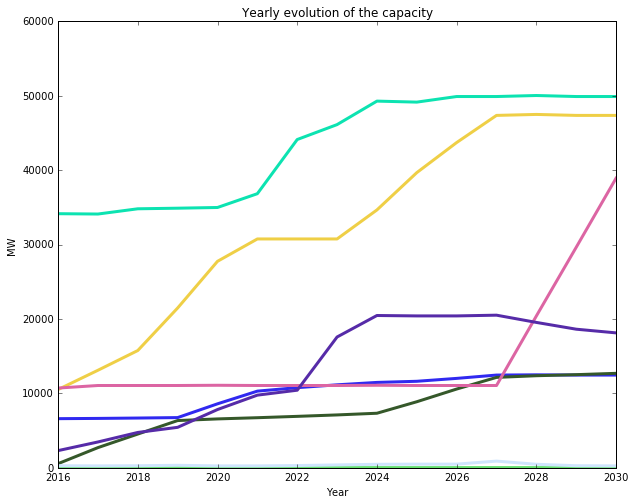

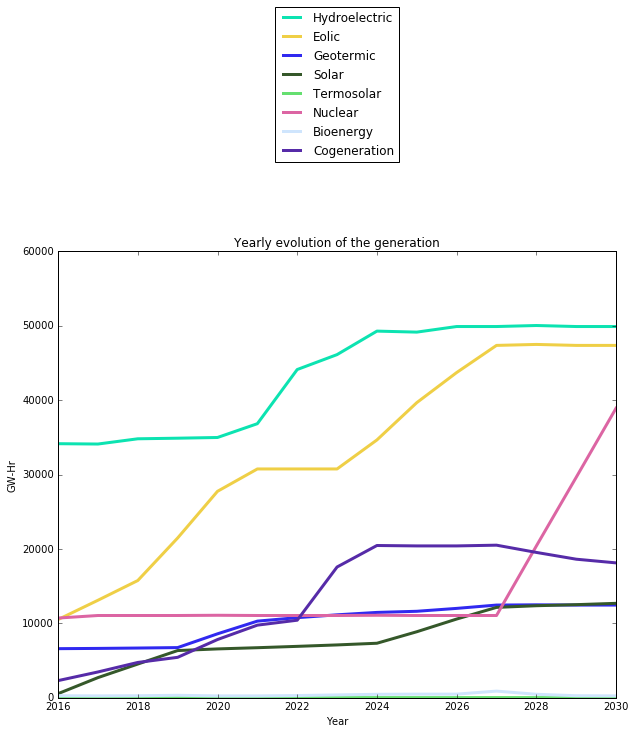

In [15]:
ev_cap=pd.read_csv('tables/CapacityEvolutionTecnology.csv',index_col=0,header=0)
ev_gen=pd.read_csv('tables/GenerationEvolutionTecnology.csv',index_col=0,header=0)
ev_cap=ev_cap.T
ev_gen=ev_gen.T
ev_cap=ev_cap.drop('Total',axis=1)
ev_gen=ev_gen.drop('Total',axis=1)
e=ev_cap.columns.tolist()
colors=np.random.rand(len(e),3)
plt.figure(4,figsize=(10,8),dpi=200)
for i in range(len(e)):
    plt.plot(ev_cap.iloc[:,i],c=colors[i],label=e[i],linewidth=3)
plt.title('Yearly evolution of the capacity')
plt.xlabel('Year')
plt.ylabel('MW')
plt.show()
plt.figure(4,figsize=(10,8),dpi=200)
e=ev_gen.columns.tolist()
for i in range(len(e)):
    plt.plot(ev_gen.iloc[:,i],c=colors[i],label=e[i],linewidth=3)
plt.title('Yearly evolution of the generation')
plt.xlabel('Year')
plt.ylabel('GW-Hr')
plt.legend(bbox_to_anchor=(0.5,1.2), loc=8, borderaxespad=0.0)
plt.show()